<a href="https://colab.research.google.com/github/anjaliagarwal8/V1_Resnet-NMA/blob/main/V1_resnet_activations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/NMADL_project/vonenet

!python setup.py install

#!git clone https://github.com/bethgelab/foolbox.git
!pip install foolbox
!pip install timm

In [ ]:
import vonenet
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
import foolbox as fb
import pandas as pd
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import timm
import cv2
import os

In [ ]:

device = torch.device('cuda')

In [ ]:
# Load V1 model (Uncomment as desired)

#v1_only_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None).module
#v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None, image_size=32, visual_degrees=3, sf_max=5, stride=1, ksize=15).module
v1_resnet50 = vonenet.get_model(model_arch='resnet50_ns', pretrained=True).module
v1_resnet50 = v1_resnet50.eval()
print(v1_resnet50)

Neuronal distributions gabor parameters
Model:  VOneResnet50


/content/drive/My Drive/NMADL_project/vonenet/vonenet/params.py:59: RuntimeWarning: invalid value encountered in true_divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


Sequential(
  (vone_block): VOneBlock(
    (simple_conv_q0): GFB()
    (simple_conv_q1): GFB()
    (simple): ReLU(inplace=True)
    (complex): Identity()
    (gabors): Identity()
    (noise): ReLU(inplace=True)
    (output): Identity()
  )
  (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (model): ResNetBackEnd(
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequentia

In [ ]:
resnet50 = models.resnet50(pretrained=True)
resnet50 = resnet50.eval()

In [ ]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
bounds = (0, 1)
fmodel = fb.PyTorchModel(resnext50_32x4d, bounds=bounds, preprocessing=preprocessing)
fmodel = fmodel.transform_bounds((0, 1))
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=16)

print(images.shape)


torch.Size([16, 3, 224, 224])


In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


In [ ]:

v1_model.vone_block.register_forward_hook(get_activation('vone_block'))
v1_model.model.layer1[0].conv1.register_forward_hook(get_activation('layer1_0_conv1'))
v1_model.model.layer1[0].conv2.register_forward_hook(get_activation('layer1_0_conv2'))
v1_model.model.layer1[0].conv3.register_forward_hook(get_activation('layer1_0_conv3'))
v1_model.model.layer1[0].downsample[0].register_forward_hook(get_activation('layer1_0_ds0'))

v1_model.model.layer1[1].conv1.register_forward_hook(get_activation('layer1_1_conv1'))
v1_model.model.layer1[1].conv2.register_forward_hook(get_activation('layer1_1_conv2'))
v1_model.model.layer1[1].conv3.register_forward_hook(get_activation('layer1_1_conv3'))



v1_model.model.layer1[2].conv1.register_forward_hook(get_activation('layer1_2_conv1'))
v1_model.model.layer1[2].conv2.register_forward_hook(get_activation('layer1_2_conv2'))
v1_model.model.layer1[2].conv3.register_forward_hook(get_activation('layer1_2_conv3'))


In [ ]:
v1_model.model.layer2[0].conv1.register_forward_hook(get_activation('layer2_0_conv1'))
v1_model.model.layer2[0].conv2.register_forward_hook(get_activation('layer2_0_conv2'))
v1_model.model.layer2[0].conv3.register_forward_hook(get_activation('layer2_0_conv3'))
v1_model.model.layer2[0].downsample[0].register_forward_hook(get_activation('layer2_0_ds0'))

v1_model.model.layer2[1].conv1.register_forward_hook(get_activation('layer2_1_conv1'))
v1_model.model.layer2[1].conv2.register_forward_hook(get_activation('layer2_1_conv2'))
v1_model.model.layer2[1].conv3.register_forward_hook(get_activation('layer2_1_conv3'))


v1_model.model.layer2[2].conv1.register_forward_hook(get_activation('layer2_2_conv1'))
v1_model.model.layer2[2].conv2.register_forward_hook(get_activation('layer2_2_conv2'))
v1_model.model.layer2[2].conv3.register_forward_hook(get_activation('layer2_2_conv3'))


v1_model.model.layer2[3].conv1.register_forward_hook(get_activation('layer2_3_conv1'))
v1_model.model.layer2[3].conv2.register_forward_hook(get_activation('layer2_3_conv2'))
v1_model.model.layer2[3].conv3.register_forward_hook(get_activation('layer2_3_conv3'))


In [ ]:
v1_model.model.layer3[0].conv1.register_forward_hook(get_activation('layer3_0_conv1'))
v1_model.model.layer3[0].conv2.register_forward_hook(get_activation('layer3_0_conv2'))
v1_model.model.layer3[0].conv3.register_forward_hook(get_activation('layer3_0_conv3'))
v1_model.model.layer3[0].downsample[0].register_forward_hook(get_activation('layer3_0_ds0'))

v1_model.model.layer3[1].conv1.register_forward_hook(get_activation('layer3_1_conv1'))
v1_model.model.layer3[1].conv2.register_forward_hook(get_activation('layer3_1_conv2'))
v1_model.model.layer3[1].conv3.register_forward_hook(get_activation('layer3_1_conv3'))


v1_model.model.layer3[2].conv1.register_forward_hook(get_activation('layer3_2_conv1'))
v1_model.model.layer3[2].conv2.register_forward_hook(get_activation('layer3_2_conv2'))
v1_model.model.layer3[2].conv3.register_forward_hook(get_activation('layer3_2_conv3'))


v1_model.model.layer3[3].conv1.register_forward_hook(get_activation('layer3_3_conv1'))
v1_model.model.layer3[3].conv2.register_forward_hook(get_activation('layer3_3_conv2'))
v1_model.model.layer3[3].conv3.register_forward_hook(get_activation('layer3_3_conv3'))


v1_model.model.layer3[4].conv1.register_forward_hook(get_activation('layer3_4_conv1'))
v1_model.model.layer3[4].conv2.register_forward_hook(get_activation('layer3_4_conv2'))
v1_model.model.layer3[4].conv3.register_forward_hook(get_activation('layer3_4_conv3'))


v1_model.model.layer3[5].conv1.register_forward_hook(get_activation('layer3_5_conv1'))
v1_model.model.layer3[5].conv2.register_forward_hook(get_activation('layer3_5_conv2'))
v1_model.model.layer3[5].conv3.register_forward_hook(get_activation('layer3_5_conv3'))


In [ ]:
v1_model.model.layer4[0].conv1.register_forward_hook(get_activation('layer4_0_conv1'))
v1_model.model.layer4[0].conv2.register_forward_hook(get_activation('layer4_0_conv2'))
v1_model.model.layer4[0].conv3.register_forward_hook(get_activation('layer4_0_conv3'))
v1_model.model.layer4[0].downsample[0].register_forward_hook(get_activation('layer4_0_ds0'))

v1_model.model.layer4[1].conv1.register_forward_hook(get_activation('layer4_1_conv1'))
v1_model.model.layer4[1].conv2.register_forward_hook(get_activation('layer4_1_conv2'))
v1_model.model.layer4[1].conv3.register_forward_hook(get_activation('layer4_1_conv3'))


v1_model.model.layer4[2].conv1.register_forward_hook(get_activation('layer4_2_conv1'))
v1_model.model.layer4[2].conv2.register_forward_hook(get_activation('layer4_2_conv2'))
v1_model.model.layer4[2].conv3.register_forward_hook(get_activation('layer4_2_conv3'))


In [ ]:
v1_act_list  =[]

In [ ]:
images

tensor([[[[0.7490, 0.7569, 0.8157,  ..., 0.2196, 0.2275, 0.2314],
          [0.7686, 0.7412, 0.7647,  ..., 0.2431, 0.2275, 0.2745],
          [0.8039, 0.7647, 0.7529,  ..., 0.2353, 0.2549, 0.3765],
          ...,
          [0.2980, 0.2510, 0.2235,  ..., 0.4706, 0.4353, 0.4078],
          [0.1490, 0.2431, 0.1843,  ..., 0.3608, 0.3725, 0.3686],
          [0.1882, 0.3020, 0.3059,  ..., 0.2314, 0.4353, 0.4980]],

         [[0.6784, 0.6902, 0.7412,  ..., 0.0353, 0.0353, 0.0627],
          [0.6980, 0.6706, 0.6902,  ..., 0.0196, 0.0353, 0.1765],
          [0.7216, 0.6902, 0.6745,  ..., 0.0157, 0.1333, 0.3961],
          ...,
          [0.3412, 0.3294, 0.2745,  ..., 0.4667, 0.4235, 0.4235],
          [0.1922, 0.2902, 0.2353,  ..., 0.3412, 0.3569, 0.3725],
          [0.2314, 0.3020, 0.3490,  ..., 0.2157, 0.4353, 0.4706]],

         [[0.5333, 0.5137, 0.5804,  ..., 0.0706, 0.0706, 0.0745],
          [0.5412, 0.4824, 0.5059,  ..., 0.0784, 0.0745, 0.1608],
          [0.5804, 0.5176, 0.4902,  ..., 0

In [ ]:
# Nyquist

visual_degrees = 8
image_size = 224

nyquist_f = 1/(visual_degrees/image_size)/2 / np.sqrt(2)

print(nyquist_f)

print(fb.utils.accuracy(fmodel, images, labels))

print(type(images), images.shape)
print(type(labels), labels.shape)



9.899494936611665
0.9375
<class 'torch.Tensor'> torch.Size([16, 3, 224, 224])
<class 'torch.Tensor'> torch.Size([16])


In [ ]:
attack = fb.attacks.LinfDeepFoolAttack()
print(attack)

raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)
print(is_adv)

LinfDeepFoolAttack(steps=50, candidates=10, overshoot=0.02, loss=logits)
tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')


In [ ]:
"""## Use EagerPy tensors and rerun the attack"""
"""
import eagerpy as ep

images = ep.astensor(images)
labels = ep.astensor(labels)

raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

print(is_adv)

print(is_adv.float32().mean().item())
"""

print("***********## Run the attack using many epsilons*********")


import numpy as np

epsilons = np.linspace(0.0, 0.005, num=20)

raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

print("is_adv shape:::",is_adv.shape)

#print("is_adv mean:::",is_adv.float32().mean(axis=-1).item())
#robust_accuracy = 1 - is_adv.float32().mean(axis=-1)
#print("robust_accuracy:::",robust_accuracy)


## Run a targeted attack

print("*****************TARGETED ATTACK****************************")
print("Labels:::",labels)

target_classes = (labels + 200) % 1000

print("Target classes:::", target_classes)

criterion = fb.criteria.TargetedMisclassification(target_classes)

attack = fb.attacks.L2CarliniWagnerAttack(steps=100)
# Note: 100 is too little -> results will be bad = perturbations will be relatively large (but 1000 takes much longer)

# epsilons = np.linspace(0.0, 10.0, num=20)
epsilons = None

advs, _, is_adv = attack(fmodel, images, criterion, epsilons=epsilons)

print("is_adv:::",is_adv)

print("distances between images and adv:::",fb.distances.l2(images, advs))

# attack_success_rate = is_adv.float32().mean(axis=-1)

# plt.plot(epsilons, attack_success_rate.numpy())



***********## Run the attack using many epsilons*********
is_adv shape::: torch.Size([20, 16])
*****************TARGETED ATTACK****************************
Labels::: tensor([243, 559, 438, 990, 949, 853, 609, 609, 915, 455, 541, 630, 741, 471,
        129,  99], device='cuda:0')
Target classes::: tensor([443, 759, 638, 190, 149,  53, 809, 809, 115, 655, 741, 830, 941, 671,
        329, 299], device='cuda:0')
is_adv::: tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')
distances between images and adv::: tensor([0.7649, 0.7219, 0.5241, 1.1482, 0.6145, 0.3800, 0.4753, 0.7821, 1.0796,
        0.9680, 0.6295, 0.3825, 1.9305, 1.4613, 0.6005, 0.8728],
       device='cuda:0')


In [ ]:
images = images.to('cpu')
#labels = labels.to('cpu')
advs = advs.to('cpu')

In [ ]:

output = v1_model(advs) #X


voneresnet_v1_activation = activation['vone_block']
print(voneresnet_v1_activation.shape)
##torch.Size([16, 512, 56, 56])

v1_layer1_0_conv1 = activation['layer1_0_conv1']
v1_layer1_0_conv2 = activation['layer1_0_conv2']
v1_layer1_0_conv3 = activation['layer1_0_conv3']

v1_layer1_1_conv1 = activation['layer1_1_conv1']
v1_layer1_1_conv2 = activation['layer1_1_conv2']
v1_layer1_1_conv3 = activation['layer1_1_conv3']

v1_layer1_2_conv1 = activation['layer1_2_conv1']
v1_layer1_2_conv2 = activation['layer1_2_conv2']
v1_layer1_2_conv3 = activation['layer1_2_conv3']

v1_act_list.extend((v1_layer1_0_conv1,v1_layer1_0_conv2,v1_layer1_0_conv3))
v1_act_list.extend((v1_layer1_1_conv1,v1_layer1_1_conv2,v1_layer1_1_conv3))
v1_act_list.extend((v1_layer1_2_conv1,v1_layer1_2_conv2,v1_layer1_2_conv3))

torch.Size([16, 512, 56, 56])


In [ ]:
v1_layer2_0_conv1 = activation['layer2_0_conv1']
v1_layer2_0_conv2 = activation['layer2_0_conv2']
v1_layer2_0_conv3 = activation['layer2_0_conv3']

v1_layer2_1_conv1 = activation['layer2_1_conv1']
v1_layer2_1_conv2 = activation['layer2_1_conv2']
v1_layer2_1_conv3 = activation['layer2_1_conv3']

v1_layer2_2_conv1 = activation['layer2_2_conv1']
v1_layer2_2_conv2 = activation['layer2_2_conv2']
v1_layer2_2_conv3 = activation['layer2_2_conv3']

v1_layer2_3_conv1 = activation['layer2_3_conv1']
v1_layer2_3_conv2 = activation['layer2_3_conv2']
v1_layer2_3_conv3 = activation['layer2_3_conv3']


v1_act_list.extend((v1_layer2_0_conv1,v1_layer1_0_conv2,v1_layer2_0_conv3))
v1_act_list.extend((v1_layer2_1_conv1,v1_layer1_1_conv2,v1_layer2_1_conv3))
v1_act_list.extend((v1_layer2_2_conv1,v1_layer1_2_conv2,v1_layer2_2_conv3))
v1_act_list.extend((v1_layer2_3_conv1,v1_layer1_2_conv2,v1_layer2_3_conv3))

In [ ]:
v1_layer3_0_conv1 = activation['layer3_0_conv1']
v1_layer3_0_conv2 = activation['layer3_0_conv2']
v1_layer3_0_conv3 = activation['layer3_0_conv3']

v1_layer3_1_conv1 = activation['layer3_1_conv1']
v1_layer3_1_conv2 = activation['layer3_1_conv2']
v1_layer3_1_conv3 = activation['layer3_1_conv3']

v1_layer3_2_conv1 = activation['layer3_2_conv1']
v1_layer3_2_conv2 = activation['layer3_2_conv2']
v1_layer3_2_conv3 = activation['layer3_2_conv3']

v1_layer3_3_conv1 = activation['layer3_3_conv1']
v1_layer3_3_conv2 = activation['layer3_3_conv2']
v1_layer3_3_conv3 = activation['layer3_3_conv3']

v1_layer3_4_conv1 = activation['layer3_4_conv1']
v1_layer3_4_conv2 = activation['layer3_4_conv2']
v1_layer3_4_conv3 = activation['layer3_4_conv3']

v1_layer3_5_conv1 = activation['layer3_5_conv1']
v1_layer3_5_conv2 = activation['layer3_5_conv2']
v1_layer3_5_conv3 = activation['layer3_5_conv3']

v1_act_list.extend((v1_layer3_0_conv1,v1_layer1_0_conv2,v1_layer3_0_conv3))
v1_act_list.extend((v1_layer3_1_conv1,v1_layer1_1_conv2,v1_layer3_1_conv3))
v1_act_list.extend((v1_layer3_2_conv1,v1_layer1_2_conv2,v1_layer3_2_conv3))
v1_act_list.extend((v1_layer3_3_conv1,v1_layer1_2_conv2,v1_layer3_3_conv3))
v1_act_list.extend((v1_layer3_4_conv1,v1_layer1_2_conv2,v1_layer3_4_conv3))
v1_act_list.extend((v1_layer3_5_conv1,v1_layer1_2_conv2,v1_layer3_5_conv3))

In [ ]:
v1_layer4_0_conv1 = activation['layer4_0_conv1']
v1_layer4_0_conv2 = activation['layer4_0_conv2']
v1_layer4_0_conv3 = activation['layer4_0_conv3']

v1_layer4_1_conv1 = activation['layer4_1_conv1']
v1_layer4_1_conv2 = activation['layer4_1_conv2']
v1_layer4_1_conv3 = activation['layer4_1_conv3']

v1_layer4_2_conv1 = activation['layer4_2_conv1']
v1_layer4_2_conv2 = activation['layer4_2_conv2']
v1_layer4_2_conv3 = activation['layer4_2_conv3']


v1_act_list.extend((v1_layer4_0_conv1,v1_layer1_0_conv2,v1_layer4_0_conv3))
v1_act_list.extend((v1_layer4_1_conv1,v1_layer1_1_conv2,v1_layer4_1_conv3))
v1_act_list.extend((v1_layer4_2_conv1,v1_layer1_2_conv2,v1_layer4_2_conv3))

In [ ]:
v1_layer1_0_ds0 = activation['layer1_0_ds0']
v1_layer2_0_ds0 = activation['layer2_0_ds0']
v1_layer3_0_ds0 = activation['layer3_0_ds0']
v1_layer4_0_ds0 = activation['layer4_0_ds0']

v1_act_list.extend((v1_layer1_0_ds0,v1_layer2_0_ds0,v1_layer3_0_ds0,v1_layer4_0_ds0))

In [ ]:
#output_activations = v1_model(X)
#print(output_activations.shape)
#print(output_activations)

In [ ]:
print(v1_act_list)

[tensor([[[[-8.5181e+00, -1.6504e+00, -4.4740e-01,  ..., -4.2581e+00,
           -4.8931e+00, -3.5232e+00],
          [-1.2864e+01, -2.5097e+00, -6.4389e-01,  ..., -6.0631e+00,
           -7.6375e+00, -5.0194e+00],
          [-1.2180e+01, -1.9385e+00, -2.3606e-01,  ..., -3.2397e+00,
           -4.7697e+00, -7.7725e-02],
          ...,
          [-5.3874e+00, -1.2253e+00,  7.8649e-02,  ..., -1.5891e+00,
           -3.0272e+00, -3.3324e-01],
          [-4.9939e+00, -6.2556e-01, -3.7023e-01,  ..., -1.5664e+00,
           -3.9317e+00,  5.8370e-01],
          [-3.9583e+00, -5.0482e-02, -4.2041e-01,  ..., -2.0026e-01,
            4.0033e-02,  2.9740e-01]],

         [[ 9.6304e-01,  8.1768e-01,  2.8767e-01,  ..., -3.3368e+00,
           -4.7034e+00, -8.0797e+00],
          [ 4.2320e-01,  8.5611e-01,  5.6569e-01,  ..., -9.1652e+00,
           -4.9906e+00, -1.0438e+01],
          [ 4.4236e-01,  4.6816e-01,  6.1851e-01,  ..., -3.7286e+00,
           -1.3393e+00, -3.8044e+00],
          ...,
    

In [ ]:
print(len(v1_act_list))

52


In [ ]:
for i in range(0,len(v1_act_list)):
  print(v1_act_list[i].shape)

print(i)

torch.Size([16, 64, 56, 56])
torch.Size([16, 64, 56, 56])
torch.Size([16, 256, 56, 56])
torch.Size([16, 64, 56, 56])
torch.Size([16, 64, 56, 56])
torch.Size([16, 256, 56, 56])
torch.Size([16, 64, 56, 56])
torch.Size([16, 64, 56, 56])
torch.Size([16, 256, 56, 56])
torch.Size([16, 128, 56, 56])
torch.Size([16, 64, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 128, 28, 28])
torch.Size([16, 64, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 128, 28, 28])
torch.Size([16, 64, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 128, 28, 28])
torch.Size([16, 64, 56, 56])
torch.Size([16, 512, 28, 28])
torch.Size([16, 256, 28, 28])
torch.Size([16, 64, 56, 56])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 256, 14, 14])
torch.Size([16, 64, 56, 56])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 256, 14, 14])
torch.Size([16, 64, 56, 56])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 256, 14, 14])
torch.Size([16, 64, 56, 56])
torch.Size([16, 1024, 14, 14])
torch.Size([16, 256,

In [ ]:

y = [i.detach().cpu().numpy() for i in v1_act_list]
print(type(y))
for i in range(0,len(y)):
  print(y[i])
  break


<class 'list'>
[[[[-8.51807499e+00 -1.65038431e+00 -4.47404981e-01 ... -4.25805950e+00
    -4.89312124e+00 -3.52324486e+00]
   [-1.28639488e+01 -2.50970244e+00 -6.43891335e-01 ... -6.06313038e+00
    -7.63752031e+00 -5.01937866e+00]
   [-1.21803837e+01 -1.93852663e+00 -2.36060873e-01 ... -3.23969197e+00
    -4.76970768e+00 -7.77254999e-02]
   ...
   [-5.38739920e+00 -1.22528112e+00  7.86493421e-02 ... -1.58914006e+00
    -3.02723479e+00 -3.33243132e-01]
   [-4.99388027e+00 -6.25556409e-01 -3.70233268e-01 ... -1.56640303e+00
    -3.93168902e+00  5.83698332e-01]
   [-3.95828319e+00 -5.04820384e-02 -4.20405418e-01 ... -2.00256616e-01
     4.00326662e-02  2.97399372e-01]]

  [[ 9.63039935e-01  8.17676365e-01  2.87674874e-01 ... -3.33679509e+00
    -4.70339537e+00 -8.07970333e+00]
   [ 4.23199534e-01  8.56107175e-01  5.65688550e-01 ... -9.16520691e+00
    -4.99060965e+00 -1.04383192e+01]
   [ 4.42358732e-01  4.68155295e-01  6.18509412e-01 ... -3.72863483e+00
    -1.33925986e+00 -3.80436373e

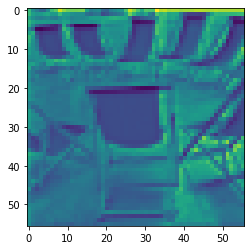

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(y[0][1,6,:,:])


In [ ]:
torch.save(v1_act_list,'v1_resnet50_pert.pt')

In [ ]:
#######################################

In [ ]:
activation = {}
resnext50_32x4d.conv1.register_forward_hook(get_activation('conv1'))
resnext50_32x4d.maxpool.register_forward_hook(get_activation('maxpool'))

resnext50_32x4d.layer1[0].conv1.register_forward_hook(get_activation('layer1_0_conv1'))
resnext50_32x4d.layer1[0].conv2.register_forward_hook(get_activation('layer1_0_conv2'))
resnext50_32x4d.layer1[0].conv3.register_forward_hook(get_activation('layer1_0_conv3'))
resnext50_32x4d.layer1[0].downsample[0].register_forward_hook(get_activation('layer1_0_ds'))

resnext50_32x4d.layer1[1].conv1.register_forward_hook(get_activation('layer1_1_conv1'))
resnext50_32x4d.layer1[1].conv2.register_forward_hook(get_activation('layer1_1_conv2'))
resnext50_32x4d.layer1[1].conv3.register_forward_hook(get_activation('layer1_1_conv3'))

resnext50_32x4d.layer1[2].conv1.register_forward_hook(get_activation('layer1_2_conv1'))
resnext50_32x4d.layer1[2].conv2.register_forward_hook(get_activation('layer1_2_conv2'))
resnext50_32x4d.layer1[2].conv3.register_forward_hook(get_activation('layer1_2_conv3'))

In [ ]:
resnext50_32x4d.layer2[0].conv1.register_forward_hook(get_activation('layer2_0_conv1'))
resnext50_32x4d.layer2[0].conv2.register_forward_hook(get_activation('layer2_0_conv2'))
resnext50_32x4d.layer2[0].conv3.register_forward_hook(get_activation('layer2_0_conv3'))
resnext50_32x4d.layer2[0].downsample[0].register_forward_hook(get_activation('layer2_0_ds'))

resnext50_32x4d.layer2[1].conv1.register_forward_hook(get_activation('layer2_1_conv1'))
resnext50_32x4d.layer2[1].conv2.register_forward_hook(get_activation('layer2_1_conv2'))
resnext50_32x4d.layer2[1].conv3.register_forward_hook(get_activation('layer2_1_conv3'))

resnext50_32x4d.layer2[2].conv1.register_forward_hook(get_activation('layer2_2_conv1'))
resnext50_32x4d.layer2[2].conv2.register_forward_hook(get_activation('layer2_2_conv2'))
resnext50_32x4d.layer2[2].conv3.register_forward_hook(get_activation('layer2_2_conv3'))

resnext50_32x4d.layer2[3].conv1.register_forward_hook(get_activation('layer2_3_conv1'))
resnext50_32x4d.layer2[3].conv2.register_forward_hook(get_activation('layer2_3_conv2'))
resnext50_32x4d.layer2[3].conv3.register_forward_hook(get_activation('layer2_3_conv3'))

In [ ]:
resnext50_32x4d.layer3[0].conv1.register_forward_hook(get_activation('layer3_0_conv1'))
resnext50_32x4d.layer3[0].conv2.register_forward_hook(get_activation('layer3_0_conv2'))
resnext50_32x4d.layer3[0].conv3.register_forward_hook(get_activation('layer3_0_conv3'))
resnext50_32x4d.layer3[0].downsample[0].register_forward_hook(get_activation('layer3_0_ds'))

resnext50_32x4d.layer3[1].conv1.register_forward_hook(get_activation('layer3_1_conv1'))
resnext50_32x4d.layer3[1].conv2.register_forward_hook(get_activation('layer3_1_conv2'))
resnext50_32x4d.layer3[1].conv3.register_forward_hook(get_activation('layer3_1_conv3'))

resnext50_32x4d.layer3[2].conv1.register_forward_hook(get_activation('layer3_2_conv1'))
resnext50_32x4d.layer3[2].conv2.register_forward_hook(get_activation('layer3_2_conv2'))
resnext50_32x4d.layer3[2].conv3.register_forward_hook(get_activation('layer3_2_conv3'))

resnext50_32x4d.layer3[3].conv1.register_forward_hook(get_activation('layer3_3_conv1'))
resnext50_32x4d.layer3[3].conv2.register_forward_hook(get_activation('layer3_3_conv2'))
resnext50_32x4d.layer3[3].conv3.register_forward_hook(get_activation('layer3_3_conv3'))

resnext50_32x4d.layer3[4].conv1.register_forward_hook(get_activation('layer3_4_conv1'))
resnext50_32x4d.layer3[4].conv2.register_forward_hook(get_activation('layer3_4_conv2'))
resnext50_32x4d.layer3[4].conv3.register_forward_hook(get_activation('layer3_4_conv3'))

resnext50_32x4d.layer3[5].conv1.register_forward_hook(get_activation('layer3_5_conv1'))
resnext50_32x4d.layer3[5].conv2.register_forward_hook(get_activation('layer3_5_conv2'))
resnext50_32x4d.layer3[5].conv3.register_forward_hook(get_activation('layer3_5_conv3'))

In [ ]:
resnext50_32x4d.layer4[0].conv1.register_forward_hook(get_activation('layer4_0_conv1'))
resnext50_32x4d.layer4[0].conv2.register_forward_hook(get_activation('layer4_0_conv2'))
resnext50_32x4d.layer4[0].conv3.register_forward_hook(get_activation('layer4_0_conv3'))
resnext50_32x4d.layer4[0].downsample[0].register_forward_hook(get_activation('layer4_0_ds'))

resnext50_32x4d.layer4[1].conv1.register_forward_hook(get_activation('layer4_1_conv1'))
resnext50_32x4d.layer4[1].conv2.register_forward_hook(get_activation('layer4_1_conv2'))
resnext50_32x4d.layer4[1].conv3.register_forward_hook(get_activation('layer4_1_conv3'))

resnext50_32x4d.layer4[2].conv1.register_forward_hook(get_activation('layer4_2_conv1'))
resnext50_32x4d.layer4[2].conv2.register_forward_hook(get_activation('layer4_2_conv2'))
resnext50_32x4d.layer4[2].conv3.register_forward_hook(get_activation('layer4_2_conv3'))


In [ ]:
resnet50_act_list = []

In [ ]:
output = resnext50_32x4d(advs) #X

In [ ]:

v1_layer1_0_conv1 = activation['layer1_0_conv1']
v1_layer1_0_conv2 = activation['layer1_0_conv2']
v1_layer1_0_conv3 = activation['layer1_0_conv3']

v1_layer1_1_conv1 = activation['layer1_1_conv1']
v1_layer1_1_conv2 = activation['layer1_1_conv2']
v1_layer1_1_conv3 = activation['layer1_1_conv3']

v1_layer1_2_conv1 = activation['layer1_2_conv1']
v1_layer1_2_conv2 = activation['layer1_2_conv2']
v1_layer1_2_conv3 = activation['layer1_2_conv3']

resnet50_act_list.extend((v1_layer1_0_conv1,v1_layer1_0_conv2,v1_layer1_0_conv3))
resnet50_act_list.extend((v1_layer1_1_conv1,v1_layer1_1_conv2,v1_layer1_1_conv3))
resnet50_act_list.extend((v1_layer1_2_conv1,v1_layer1_2_conv2,v1_layer1_2_conv3))

In [ ]:
v1_layer2_0_conv1 = activation['layer2_0_conv1']
v1_layer2_0_conv2 = activation['layer2_0_conv2']
v1_layer2_0_conv3 = activation['layer2_0_conv3']

v1_layer2_1_conv1 = activation['layer2_1_conv1']
v1_layer2_1_conv2 = activation['layer2_1_conv2']
v1_layer2_1_conv3 = activation['layer2_1_conv3']

v1_layer2_2_conv1 = activation['layer2_2_conv1']
v1_layer2_2_conv2 = activation['layer2_2_conv2']
v1_layer2_2_conv3 = activation['layer2_2_conv3']

v1_layer2_3_conv1 = activation['layer2_3_conv1']
v1_layer2_3_conv2 = activation['layer2_3_conv2']
v1_layer2_3_conv3 = activation['layer2_3_conv3']


resnet50_act_list.extend((v1_layer2_0_conv1,v1_layer1_0_conv2,v1_layer2_0_conv3))
resnet50_act_list.extend((v1_layer2_1_conv1,v1_layer1_1_conv2,v1_layer2_1_conv3))
resnet50_act_list.extend((v1_layer2_2_conv1,v1_layer1_2_conv2,v1_layer2_2_conv3))
resnet50_act_list.extend((v1_layer2_3_conv1,v1_layer1_2_conv2,v1_layer2_3_conv3))

In [ ]:
v1_layer3_0_conv1 = activation['layer3_0_conv1']
v1_layer3_0_conv2 = activation['layer3_0_conv2']
v1_layer3_0_conv3 = activation['layer3_0_conv3']

v1_layer3_1_conv1 = activation['layer3_1_conv1']
v1_layer3_1_conv2 = activation['layer3_1_conv2']
v1_layer3_1_conv3 = activation['layer3_1_conv3']

v1_layer3_2_conv1 = activation['layer3_2_conv1']
v1_layer3_2_conv2 = activation['layer3_2_conv2']
v1_layer3_2_conv3 = activation['layer3_2_conv3']

v1_layer3_3_conv1 = activation['layer3_3_conv1']
v1_layer3_3_conv2 = activation['layer3_3_conv2']
v1_layer3_3_conv3 = activation['layer3_3_conv3']

v1_layer3_4_conv1 = activation['layer3_4_conv1']
v1_layer3_4_conv2 = activation['layer3_4_conv2']
v1_layer3_4_conv3 = activation['layer3_4_conv3']

v1_layer3_5_conv1 = activation['layer3_5_conv1']
v1_layer3_5_conv2 = activation['layer3_5_conv2']
v1_layer3_5_conv3 = activation['layer3_5_conv3']

resnet50_act_list.extend((v1_layer3_0_conv1,v1_layer1_0_conv2,v1_layer3_0_conv3))
resnet50_act_list.extend((v1_layer3_1_conv1,v1_layer1_1_conv2,v1_layer3_1_conv3))
resnet50_act_list.extend((v1_layer3_2_conv1,v1_layer1_2_conv2,v1_layer3_2_conv3))
resnet50_act_list.extend((v1_layer3_3_conv1,v1_layer1_2_conv2,v1_layer3_3_conv3))
resnet50_act_list.extend((v1_layer3_4_conv1,v1_layer1_2_conv2,v1_layer3_4_conv3))
resnet50_act_list.extend((v1_layer3_5_conv1,v1_layer1_2_conv2,v1_layer3_5_conv3))

In [ ]:
v1_layer4_0_conv1 = activation['layer4_0_conv1']
v1_layer4_0_conv2 = activation['layer4_0_conv2']
v1_layer4_0_conv3 = activation['layer4_0_conv3']

v1_layer4_1_conv1 = activation['layer4_1_conv1']
v1_layer4_1_conv2 = activation['layer4_1_conv2']
v1_layer4_1_conv3 = activation['layer4_1_conv3']

v1_layer4_2_conv1 = activation['layer4_2_conv1']
v1_layer4_2_conv2 = activation['layer4_2_conv2']
v1_layer4_2_conv3 = activation['layer4_2_conv3']


resnet50_act_list.extend((v1_layer4_0_conv1,v1_layer1_0_conv2,v1_layer4_0_conv3))
resnet50_act_list.extend((v1_layer4_1_conv1,v1_layer1_1_conv2,v1_layer4_1_conv3))
resnet50_act_list.extend((v1_layer4_2_conv1,v1_layer1_2_conv2,v1_layer4_2_conv3))

In [ ]:
v1_layer1_0_ds0 = activation['layer1_0_ds']
v1_layer2_0_ds0 = activation['layer2_0_ds']
v1_layer3_0_ds0 = activation['layer3_0_ds']
v1_layer4_0_ds0 = activation['layer4_0_ds']

resnet50_act_list.extend((v1_layer1_0_ds0,v1_layer2_0_ds0,v1_layer3_0_ds0,v1_layer4_0_ds0))

In [ ]:
#activations

In [ ]:
resnet50_act_list

[tensor([[[[-0.4517, -0.3509, -0.3514,  ..., -0.4019, -0.4084, -0.4847],
           [-0.3828, -0.3358, -0.3541,  ..., -0.4225, -0.4716, -0.4490],
           [-0.3965, -0.3513, -0.3668,  ..., -0.4295, -0.4675, -0.4263],
           ...,
           [-0.5100, -0.5043, -0.5582,  ..., -0.5378, -0.4940, -0.5408],
           [-0.5966, -0.5700, -0.5477,  ..., -0.5874, -0.5209, -0.5451],
           [-0.5721, -0.5699, -0.5740,  ..., -0.5966, -0.5559, -0.5661]],
 
          [[-0.3680, -0.3231, -0.3212,  ..., -0.3783, -0.4551, -0.3409],
           [-0.2709, -0.2513, -0.2647,  ..., -0.3287, -0.3072, -0.3337],
           [-0.2728, -0.2445, -0.2539,  ..., -0.3020, -0.3505, -0.3265],
           ...,
           [-0.4722, -0.4832, -0.4496,  ..., -0.3474, -0.3591, -0.4676],
           [-0.4356, -0.4626, -0.4555,  ..., -0.4811, -0.4076, -0.4101],
           [-0.3826, -0.4837, -0.4966,  ..., -0.5038, -0.4295, -0.4227]],
 
          [[ 0.3130,  0.1993,  0.2010,  ...,  0.3223,  0.3143,  0.2405],
           [ 

In [ ]:
len(resnet50_act_list)

52

In [ ]:
torch.save(resnet50_act_list,'resnet50_pert.pt')

In [ ]:
fb.utils.accuracy(fmodel, images, labels)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0.9375

In [ ]:
type(images), images.shape

(torch.Tensor, torch.Size([16, 3, 224, 224]))

In [ ]:
type(labels), labels.shape

(torch.Tensor, torch.Size([16]))

In [ ]:
attack = fb.attacks.LinfDeepFoolAttack()

In [ ]:
print(attack)

LinfDeepFoolAttack(steps=50, candidates=10, overshoot=0.02, loss=logits)


In [ ]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

In [ ]:
is_adv

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

In [ ]:
"""## Use EagerPy tensors and rerun the attack"""

import eagerpy as ep

images = ep.astensor(images)
labels = ep.astensor(labels)

raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

print(is_adv)

print(is_adv.float32().mean().item())


PyTorchTensor(tensor([True, True, True, True, True, True, True, True, True, True, True, True,
                      True, True, True, True], device='cuda:0'))
1.0


In [ ]:
"""## Using the Misclassification criterion explicitly"""

criterion = fb.criteria.Misclassification(labels)

raw, clipped, is_adv = attack(fmodel, images, criterion, epsilons=0.03)

print(is_adv)


PyTorchTensor(tensor([True, True, True, True, True, True, True, True, True, True, True, True,
                      True, True, True, True], device='cuda:0'))


In [ ]:
"""## Run the attack using many epsilons"""



"""#### Solution"""

import numpy as np

epsilons = np.linspace(0.0, 0.005, num=20)

raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

print(is_adv.shape)

print(is_adv.float32().mean(axis=-1))

robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

print(robust_accuracy)

torch.Size([20, 16])
PyTorchTensor(tensor([0.0625, 0.1875, 0.4375, 0.4375, 0.5000, 0.6250, 0.7500, 0.7500, 0.7500,
                      0.8125, 0.9375, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
                      1.0000, 1.0000], device='cuda:0'))
PyTorchTensor(tensor([0.9375, 0.8125, 0.5625, 0.5625, 0.5000, 0.3750, 0.2500, 0.2500, 0.2500,
                      0.1875, 0.0625, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                      0.0000, 0.0000], device='cuda:0'))


In [ ]:
## Run a targeted attack


print(labels)

target_classes = (labels + 200) % 1000

print(target_classes)

criterion = fb.criteria.TargetedMisclassification(target_classes)

attack = fb.attacks.L2CarliniWagnerAttack(steps=100)
# Note: 100 is too little -> results will be bad = perturbations will be relatively large (but 1000 takes much longer)

# epsilons = np.linspace(0.0, 10.0, num=20)
epsilons = None

advs, _, is_adv = attack(fmodel, images, criterion, epsilons=epsilons)

print(is_adv)

print(fb.distances.l2(images, advs))

# attack_success_rate = is_adv.float32().mean(axis=-1)

# plt.plot(epsilons, attack_success_rate.numpy())

PyTorchTensor(tensor([243, 559, 438, 990, 949, 853, 609, 609, 915, 455, 541, 630, 741, 471,
                      129,  99], device='cuda:0'))
PyTorchTensor(tensor([443, 759, 638, 190, 149,  53, 809, 809, 115, 655, 741, 830, 941, 671,
                      329, 299], device='cuda:0'))
PyTorchTensor(tensor([True, True, True, True, True, True, True, True, True, True, True, True,
                      True, True, True, True], device='cuda:0'))
PyTorchTensor(tensor([0.7682, 0.7037, 0.5149, 1.1855, 0.5832, 0.3686, 0.4669, 0.7730, 0.9449,
                      0.9000, 0.6340, 0.3748, 1.9164, 1.4613, 0.5783, 0.8650],
                     device='cuda:0'))


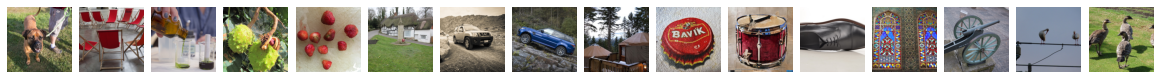

In [ ]:
"""## Visualizing adversarial examples and perturbations"""


fb.plot.images(images)



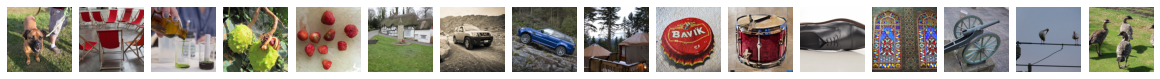

In [ ]:
fb.plot.images(advs)

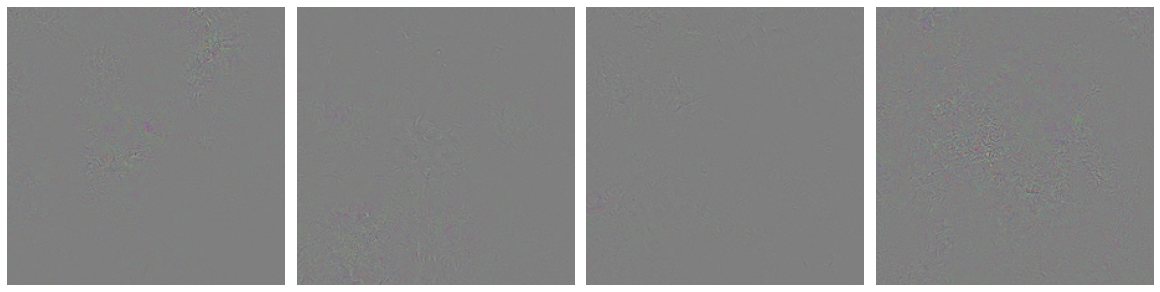

In [ ]:
fb.plot.images(advs - images, n=4, bounds=(-0.1, 0.1), scale=4.)